In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
load_profile = pd.read_excel('ceew.xlsx', sheet_name='Load_Profile')
load_profile.head()

,Unnamed: 0,Delhi,Haryana,Himachal_Pradesh,Jammu_Kashmir,Punjab,Rajasthan,Uttar_Pradesh,Uttarakhand,Chhattisgarh,...,Andhra_Pradesh,Karnataka,Kerala,Tamil_Nadu,Bihar,Jharkhand,Odisha,West_Bengal,Telangana,NER
0,2030-04-01 00:00:00,5680,13335,720,2357,7973,13247,31300,2705,5991,...,14272,15655,5463,23060,4105,6926,4374,12551,15929,2872
1,2030-04-01 01:00:00,5323,11733,766,2299,7692,12648,30965,2688,6341,...,14090,15633,5186,22681,4194,6898,4215,11957,15725,2679
2,2030-04-01 02:00:00,5050,10898,767,2240,7459,12218,31127,2634,6322,...,13957,15340,5022,21684,4293,6895,4098,11620,15577,2528
3,2030-04-01 03:00:00,4835,11140,728,2205,7379,12324,30849,2603,6258,...,13918,15359,4903,21292,4136,6977,4040,11303,15533,2418
4,2030-04-01 04:00:00,4730,12883,793,2167,7530,11988,31048,2566,6284,...,14171,15632,4863,21165,4086,7013,4137,11158,15816,2387


In [6]:
# Exclude the first two columns ('Unnamed: 0', and the empty string column), and summing over the rest
load_profile['Hourly_Demand'] = load_profile.iloc[:, 2:].sum(axis=1)
load_profile.head()

,Unnamed: 0,Delhi,Haryana,Himachal_Pradesh,Jammu_Kashmir,Punjab,Rajasthan,Uttar_Pradesh,Uttarakhand,Chhattisgarh,...,Karnataka,Kerala,Tamil_Nadu,Bihar,Jharkhand,Odisha,West_Bengal,Telangana,NER,Hourly_Demand
0,2030-04-01 00:00:00,5680,13335,720,2357,7973,13247,31300,2705,5991,...,15655,5463,23060,4105,6926,4374,12551,15929,2872,263149
1,2030-04-01 01:00:00,5323,11733,766,2299,7692,12648,30965,2688,6341,...,15633,5186,22681,4194,6898,4215,11957,15725,2679,257103
2,2030-04-01 02:00:00,5050,10898,767,2240,7459,12218,31127,2634,6322,...,15340,5022,21684,4293,6895,4098,11620,15577,2528,251570
3,2030-04-01 03:00:00,4835,11140,728,2205,7379,12324,30849,2603,6258,...,15359,4903,21292,4136,6977,4040,11303,15533,2418,249164
4,2030-04-01 04:00:00,4730,12883,793,2167,7530,11988,31048,2566,6284,...,15632,4863,21165,4086,7013,4137,11158,15816,2387,250799


In [8]:
# Convert 'Unnamed: 0' column to datetime
load_profile['Unnamed: 0'] = pd.to_datetime(load_profile['Unnamed: 0'])

# Set 'Unnamed: 0' as the index
load_profile.set_index('Unnamed: 0', inplace=True)
load_profile.head()

,Delhi,Haryana,Himachal_Pradesh,Jammu_Kashmir,Punjab,Rajasthan,Uttar_Pradesh,Uttarakhand,Chhattisgarh,Gujarat,...,Karnataka,Kerala,Tamil_Nadu,Bihar,Jharkhand,Odisha,West_Bengal,Telangana,NER,Hourly_Demand
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2030-04-01 00:00:00,5680,13335,720,2357,7973,13247,31300,2705,5991,25808,...,15655,5463,23060,4105,6926,4374,12551,15929,2872,263149
2030-04-01 01:00:00,5323,11733,766,2299,7692,12648,30965,2688,6341,25427,...,15633,5186,22681,4194,6898,4215,11957,15725,2679,257103
2030-04-01 02:00:00,5050,10898,767,2240,7459,12218,31127,2634,6322,24805,...,15340,5022,21684,4293,6895,4098,11620,15577,2528,251570
2030-04-01 03:00:00,4835,11140,728,2205,7379,12324,30849,2603,6258,24302,...,15359,4903,21292,4136,6977,4040,11303,15533,2418,249164
2030-04-01 04:00:00,4730,12883,793,2167,7530,11988,31048,2566,6284,23829,...,15632,4863,21165,4086,7013,4137,11158,15816,2387,250799


In [10]:
# Group by the date and sum the 'Hourly_Demand'
daily_load_profile = load_profile.resample('D').sum()

# Resetting the index
daily_load_profile = daily_load_profile.reset_index()
daily_load_profile = daily_load_profile.rename(columns={'Hourly_Demand': 'Daily_Demand'})

daily_load_profile.head()

,Unnamed: 0,Delhi,Haryana,Himachal_Pradesh,Jammu_Kashmir,Punjab,Rajasthan,Uttar_Pradesh,Uttarakhand,Chhattisgarh,...,Karnataka,Kerala,Tamil_Nadu,Bihar,Jharkhand,Odisha,West_Bengal,Telangana,NER,Daily_Demand
0,2030-04-01,137441,308268,27931,57100,223371,295127,698999,69463,148039,...,364681,133147,526692,100043,156353,101595,280731,390845,78953,6197919
1,2030-04-02,131100,286745,23696,56915,193150,288478,665126,62386,145711,...,340895,122960,493322,104541,156913,99057,257815,383590,69472,5935425
2,2030-04-03,143209,304399,28430,56522,205521,294862,695796,71908,151252,...,354334,133548,520400,106823,162576,87593,268025,388405,61717,6139631
3,2030-04-04,140744,300702,25613,54352,178783,293049,695907,77099,152215,...,358490,134340,541438,104280,169085,93439,278494,388889,75639,6167418
4,2030-04-05,135274,254889,26401,47313,144406,292867,618278,63256,148377,...,346760,133923,547945,99710,160958,98583,279499,392712,84418,5992776


In [79]:
# Find the day with maximum demand
max_demand_day = daily_load_profile.loc[daily_load_profile['Daily_Demand'].idxmax(), 'Unnamed: 0']

# Find the day with minimum demand
min_demand_day = daily_load_profile.loc[daily_load_profile['Daily_Demand'].idxmin(), 'Unnamed: 0']


# Print the max and min demand days
print(f"The day with maximum demand is: {max_demand_day}")
print(f"The day with minimum demand is: {min_demand_day}")

The day with maximum demand is: 2030-08-18 00:00:00
The day with minimum demand is: 2030-12-03 00:00:00


In [145]:
# Find the maximum demand
max_demand = daily_load_profile['Daily_Demand'].max()

# Find the minimum demand
min_demand = daily_load_profile['Daily_Demand'].min()

# Print the max and min demand
print(f"The maximum demand is: {max_demand} MW")
print(f"The minimum demand is: {min_demand} MW")

The maximum demand is: 6594383 MW
The minimum demand is: 5421824 MW


In [148]:
min_demand_day

,Biomass_W2E,Coal,Hydro,Hydro_RoR,I_gas,LS,Liq_Fuel,Nuclear,Small Hydro,Solar,d_gas,wind,hourly_vre,hourly_generation
time,,,,,,,,,,,,,,
2030-06-22 00:00:00,6783.000000,117843.000000,37552.974155,4245.041667,0.0,0.0,0.0,10405,2136.708333,0.000000,5113.000000,82994.275845,82994.275845,267073.0
2030-06-22 01:00:00,6783.000000,117174.000000,33702.183041,4245.041667,0.0,0.0,0.0,10405,2136.708333,0.000000,4961.400000,79432.666959,79432.666959,258840.0
2030-06-22 02:00:00,3925.734237,116234.000000,29704.650000,4245.041667,0.0,0.0,0.0,10405,2136.708333,0.000000,4681.400000,80169.465763,80169.465763,251502.0
2030-06-22 03:00:00,0.000000,114289.850000,25367.514044,4245.041667,0.0,0.0,0.0,10405,2136.708333,0.000000,3301.000000,87711.885956,87711.885956,247457.0
2030-06-22 04:00:00,0.000000,112105.361255,19479.700000,4245.041667,0.0,0.0,0.0,10405,2136.708333,0.000000,2893.400000,91699.788745,91699.788745,242965.0
2030-06-22 05:00:00,0.000000,111886.867588,21790.737198,4245.041667,0.0,0.0,0.0,10405,2136.708333,115.645094,2685.200000,90097.800119,90213.445213,243363.0
2030-06-22 06:00:00,0.000000,108126.700000,25770.286073,4245.041667,0.0,0.0,0.0,10405,2136.708333,5790.428435,2221.800000,86548.035492,92338.463927,245244.0
2030-06-22 07:00:00,0.000000,103907.622847,17870.950000,4245.041667,0.0,0.0,0.0,10405,2136.708333,23432.503452,1920.800000,82035.373701,105467.877153,245954.0
2030-06-22 08:00:00,0.000000,90184.492935,4950.128621,4245.041667,0.0,0.0,0.0,10405,2136.708333,45892.582437,1557.000000,82618.046006,128510.628444,241989.0


In [80]:
# Filter the original dataframe for these dates
df_max_demand = load_profile[load_profile.index.date == max_demand_day.date()]
df_min_demand = load_profile[load_profile.index.date == min_demand_day.date()]
df_max_demand.head()
df_min_demand.head()

,Delhi,Haryana,Himachal_Pradesh,Jammu_Kashmir,Punjab,Rajasthan,Uttar_Pradesh,Uttarakhand,Chhattisgarh,Gujarat,...,Karnataka,Kerala,Tamil_Nadu,Bihar,Jharkhand,Odisha,West_Bengal,Telangana,NER,Hourly_Demand
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2030-12-03 00:00:00,2859,10706,1286,2415,4134,14423,22649,2823,3791,20697,...,10658,3699,16927,3368,6493,2700,4791,11815,2781,204752
2030-12-03 01:00:00,2639,10674,1261,2393,3930,14055,21785,2741,3786,20448,...,10467,3578,16505,3106,6420,2622,4457,11737,2720,201125
2030-12-03 02:00:00,2525,10712,1258,2383,3807,13727,21345,2735,3704,20117,...,10047,3526,16030,3064,6416,2688,4203,11554,2773,198786
2030-12-03 03:00:00,2475,10842,1275,2385,3848,13186,21218,2717,3736,19791,...,10107,3483,15807,3001,6393,2726,4168,11574,2819,198394
2030-12-03 04:00:00,2489,11588,1321,2420,4102,12281,21655,2778,3833,20154,...,10588,3459,15830,3112,6388,2859,4273,12623,2893,203013


In [81]:
dispatch = pd.read_excel('ceew.xlsx', header=[0, 1, 2], sheet_name='Dispatch')


In [82]:
dispatch.head(1)

,name,LS_Punjab,LS_Haryana,LS_UP,LS_Rajasthan,LS_Delhi,LS_Uttarakhand,LS_HP,LS_J_K,LS_Bihar,...,Station_10_RoR,Station_11_RoR,Station_12_RoR,Station_13_RoR,Station_14_RoR,Station_15_RoR,Station_16_RoR,Station_17_RoR,Station_18_RoR,Station_19_RoR
,bus,Punjab,Haryana,Uttar_Pradesh,Rajasthan,Delhi,Uttarakhand,Himachal_Pradesh,Jammu_Kashmir,Bihar,...,Madhya_Pradesh,NER,Odisha,Punjab,Rajasthan,Telangana,Tamil_Nadu,Uttar_Pradesh,Uttarakhand,West_Bengal
,carrier,LS,LS,LS,LS,LS,LS,LS,LS,LS,...,Hydro_RoR,Hydro_RoR,Hydro_RoR,Hydro_RoR,Hydro_RoR,Hydro_RoR,Hydro_RoR,Hydro_RoR,Hydro_RoR,Hydro_RoR
0,2030-04-01,0,0,0.0,0,0.0,0,0,0.0,0,...,9.291667,85.291667,1.125,34.375,8.583333,0.0,1.875,9.666667,63.208333,27.458333


In [83]:
# Keep only the third header
dispatch.columns = dispatch.columns.get_level_values(2)



In [84]:

dispatch.head()

,carrier,LS,LS,LS,LS,LS,LS,LS,LS,LS,...,Hydro_RoR,Hydro_RoR,Hydro_RoR,Hydro_RoR,Hydro_RoR,Hydro_RoR,Hydro_RoR,Hydro_RoR,Hydro_RoR,Hydro_RoR
0,2030-04-01 00:00:00,0,0,0.0,0,0.0,0,0,0.0,0,...,9.291667,85.291667,1.125,34.375,8.583333,0.0,1.875,9.666667,63.208333,27.458333
1,2030-04-01 01:00:00,0,0,0.0,0,0.0,0,0,0.0,0,...,9.291667,85.291667,1.125,34.375,8.583333,0.0,1.875,9.666667,63.208333,27.458333
2,2030-04-01 02:00:00,0,0,0.0,0,0.0,0,0,0.0,0,...,9.291667,85.291667,1.125,34.375,8.583333,0.0,1.875,9.666667,63.208333,27.458333
3,2030-04-01 03:00:00,0,0,0.0,0,0.0,0,0,0.0,0,...,9.291667,85.291667,1.125,34.375,8.583333,0.0,1.875,9.666667,63.208333,27.458333
4,2030-04-01 04:00:00,0,0,0.0,0,0.0,0,0,0.0,0,...,9.291667,85.291667,1.125,34.375,8.583333,0.0,1.875,9.666667,63.208333,27.458333


In [91]:
hourly_dispatch = dispatch.groupby(by=dispatch.columns, axis=1).sum()

In [92]:
hourly_dispatch.head()

,Biomass_W2E,Coal,Hydro,Hydro_RoR,I_gas,LS,Liq_Fuel,Nuclear,Small Hydro,Solar,carrier,d_gas,wind
0,6783.0,186878.793603,14698.579917,1595.125,0.0,0.0,0.0,10405,928.125,0.0,2030-04-01 00:00:00,5370.0,42170.376481
1,6783.0,186849.000000,11480.474837,1595.125,0.0,0.0,0.0,10405,928.125,0.0,2030-04-01 01:00:00,5370.0,39015.275163
2,6783.0,186849.000000,11978.019042,1595.125,0.0,0.0,0.0,10405,928.125,0.0,2030-04-01 02:00:00,5298.0,32783.730958
3,6783.0,186849.000000,25265.155331,1595.125,0.0,0.0,0.0,10405,928.125,0.0,2030-04-01 03:00:00,5370.0,16803.594669
4,6783.0,186849.000000,29487.736025,1595.125,0.0,0.0,0.0,10405,928.125,0.0,2030-04-01 04:00:00,5377.0,14104.013975


In [93]:
# Create a list of column names
cols = hourly_dispatch.columns.tolist()

# Remove 'carrier' from the list
cols.remove('carrier')

# Insert 'carrier' at the second position
cols.insert(0, 'carrier')

# Reindex the DataFrame
hourly_dispatch = hourly_dispatch[cols]

# Rename 'carrier' to 'time'
hourly_dispatch = hourly_dispatch.rename(columns={'carrier': 'time'})

hourly_dispatch.head()

,time,Biomass_W2E,Coal,Hydro,Hydro_RoR,I_gas,LS,Liq_Fuel,Nuclear,Small Hydro,Solar,d_gas,wind
0,2030-04-01 00:00:00,6783.0,186878.793603,14698.579917,1595.125,0.0,0.0,0.0,10405,928.125,0.0,5370.0,42170.376481
1,2030-04-01 01:00:00,6783.0,186849.000000,11480.474837,1595.125,0.0,0.0,0.0,10405,928.125,0.0,5370.0,39015.275163
2,2030-04-01 02:00:00,6783.0,186849.000000,11978.019042,1595.125,0.0,0.0,0.0,10405,928.125,0.0,5298.0,32783.730958
3,2030-04-01 03:00:00,6783.0,186849.000000,25265.155331,1595.125,0.0,0.0,0.0,10405,928.125,0.0,5370.0,16803.594669
4,2030-04-01 04:00:00,6783.0,186849.000000,29487.736025,1595.125,0.0,0.0,0.0,10405,928.125,0.0,5377.0,14104.013975


In [94]:
# Create 'hourly_vre' column as the sum of 'Solar' and 'wind'
hourly_dispatch['hourly_vre'] = hourly_dispatch['Solar'] + hourly_dispatch['wind']

# Create 'hourly_generation' as the sum of all generation columns
# Exclude 'time' column from the sum as it's not a generation source
generation_columns = hourly_dispatch.columns.difference(['time', 'hourly_vre'])
hourly_dispatch['hourly_generation'] = hourly_dispatch[generation_columns].sum(axis=1)

In [95]:
hourly_dispatch.head()

,time,Biomass_W2E,Coal,Hydro,Hydro_RoR,I_gas,LS,Liq_Fuel,Nuclear,Small Hydro,Solar,d_gas,wind,hourly_vre,hourly_generation
0,2030-04-01 00:00:00,6783.0,186878.793603,14698.579917,1595.125,0.0,0.0,0.0,10405,928.125,0.0,5370.0,42170.376481,42170.376481,268829.0
1,2030-04-01 01:00:00,6783.0,186849.000000,11480.474837,1595.125,0.0,0.0,0.0,10405,928.125,0.0,5370.0,39015.275163,39015.275163,262426.0
2,2030-04-01 02:00:00,6783.0,186849.000000,11978.019042,1595.125,0.0,0.0,0.0,10405,928.125,0.0,5298.0,32783.730958,32783.730958,256620.0
3,2030-04-01 03:00:00,6783.0,186849.000000,25265.155331,1595.125,0.0,0.0,0.0,10405,928.125,0.0,5370.0,16803.594669,16803.594669,253999.0
4,2030-04-01 04:00:00,6783.0,186849.000000,29487.736025,1595.125,0.0,0.0,0.0,10405,928.125,0.0,5377.0,14104.013975,14104.013975,255529.0


In [96]:
# Convert 'time' to datetime if it's not already
hourly_dispatch['time'] = pd.to_datetime(hourly_dispatch['time'])

# Set 'time' as the index of the DataFrame
hourly_dispatch.set_index('time', inplace=True)

# Create a daily dispatch DataFrame by resampling and summing
daily_dispatch = hourly_dispatch.resample('D').sum()


In [97]:
daily_dispatch = daily_dispatch.rename(columns={
    'hourly_vre': 'daily_vre',
    'hourly_generation': 'daily_generation'
})

daily_dispatch.head()

,Biomass_W2E,Coal,Hydro,Hydro_RoR,I_gas,LS,Liq_Fuel,Nuclear,Small Hydro,Solar,d_gas,wind,daily_vre,daily_generation
time,,,,,,,,,,,,,,
2030-04-01,94962.000000,3.864978e+06,318751.0,38274.333333,0.0,0.000000e+00,0.0,249720,22259.750000,912027.688499,100021.800000,734365.906900,1.646394e+06,6335360.0
2030-04-02,87824.000000,3.697587e+06,228241.0,44299.750000,0.0,0.000000e+00,0.0,249720,27399.166667,867494.935254,91272.000000,772686.952837,1.640182e+06,6066525.0
2030-04-03,95431.531492,3.878010e+06,312003.0,45676.750000,0.0,4.239515e-13,0.0,249720,29152.083333,897711.236357,100429.400000,674706.243095,1.572417e+06,6282840.0
2030-04-04,94946.009721,3.902669e+06,369081.0,49530.000000,0.0,0.000000e+00,0.0,249720,29286.000000,905792.438078,101966.800000,605170.416197,1.510963e+06,6308162.0
2030-04-05,94773.677549,3.791499e+06,233422.0,49435.333333,0.0,0.000000e+00,0.0,249720,29674.916667,886079.760079,95815.003131,697630.483671,1.583710e+06,6128050.0


In [98]:
# Find the day with maximum daily_vre
max_vre_day = daily_dispatch['daily_vre'].idxmax()

print("VRE Generation i smaximum on:", max_vre_day)
# Find the maximum daily_vre
max_daily_vre = daily_dispatch['daily_vre'].max()

print("The maximum daily Variable Renewable Energy (VRE) is:", max_daily_vre)

VRE Generation i smaximum on: 2030-06-22 00:00:00
The maximum daily Variable Renewable Energy (VRE) is: 2803562.720490333


In [99]:
hourly_dispatch.head()

,Biomass_W2E,Coal,Hydro,Hydro_RoR,I_gas,LS,Liq_Fuel,Nuclear,Small Hydro,Solar,d_gas,wind,hourly_vre,hourly_generation
time,,,,,,,,,,,,,,
2030-04-01 00:00:00,6783.0,186878.793603,14698.579917,1595.125,0.0,0.0,0.0,10405,928.125,0.0,5370.0,42170.376481,42170.376481,268829.0
2030-04-01 01:00:00,6783.0,186849.000000,11480.474837,1595.125,0.0,0.0,0.0,10405,928.125,0.0,5370.0,39015.275163,39015.275163,262426.0
2030-04-01 02:00:00,6783.0,186849.000000,11978.019042,1595.125,0.0,0.0,0.0,10405,928.125,0.0,5298.0,32783.730958,32783.730958,256620.0
2030-04-01 03:00:00,6783.0,186849.000000,25265.155331,1595.125,0.0,0.0,0.0,10405,928.125,0.0,5370.0,16803.594669,16803.594669,253999.0
2030-04-01 04:00:00,6783.0,186849.000000,29487.736025,1595.125,0.0,0.0,0.0,10405,928.125,0.0,5377.0,14104.013975,14104.013975,255529.0


In [100]:


df_vre_max = hourly_dispatch[hourly_dispatch.index.date == max_vre_day.date()]

In [101]:
df_vre_max.head()

,Biomass_W2E,Coal,Hydro,Hydro_RoR,I_gas,LS,Liq_Fuel,Nuclear,Small Hydro,Solar,d_gas,wind,hourly_vre,hourly_generation
time,,,,,,,,,,,,,,
2030-06-22 00:00:00,6783.000000,117843.000000,37552.974155,4245.041667,0.0,0.0,0.0,10405,2136.708333,0.0,5113.0,82994.275845,82994.275845,267073.0
2030-06-22 01:00:00,6783.000000,117174.000000,33702.183041,4245.041667,0.0,0.0,0.0,10405,2136.708333,0.0,4961.4,79432.666959,79432.666959,258840.0
2030-06-22 02:00:00,3925.734237,116234.000000,29704.650000,4245.041667,0.0,0.0,0.0,10405,2136.708333,0.0,4681.4,80169.465763,80169.465763,251502.0
2030-06-22 03:00:00,0.000000,114289.850000,25367.514044,4245.041667,0.0,0.0,0.0,10405,2136.708333,0.0,3301.0,87711.885956,87711.885956,247457.0
2030-06-22 04:00:00,0.000000,112105.361255,19479.700000,4245.041667,0.0,0.0,0.0,10405,2136.708333,0.0,2893.4,91699.788745,91699.788745,242965.0


In [102]:
df_min_demand.head()



,Delhi,Haryana,Himachal_Pradesh,Jammu_Kashmir,Punjab,Rajasthan,Uttar_Pradesh,Uttarakhand,Chhattisgarh,Gujarat,...,Karnataka,Kerala,Tamil_Nadu,Bihar,Jharkhand,Odisha,West_Bengal,Telangana,NER,Hourly_Demand
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2030-12-03 00:00:00,2859,10706,1286,2415,4134,14423,22649,2823,3791,20697,...,10658,3699,16927,3368,6493,2700,4791,11815,2781,204752
2030-12-03 01:00:00,2639,10674,1261,2393,3930,14055,21785,2741,3786,20448,...,10467,3578,16505,3106,6420,2622,4457,11737,2720,201125
2030-12-03 02:00:00,2525,10712,1258,2383,3807,13727,21345,2735,3704,20117,...,10047,3526,16030,3064,6416,2688,4203,11554,2773,198786
2030-12-03 03:00:00,2475,10842,1275,2385,3848,13186,21218,2717,3736,19791,...,10107,3483,15807,3001,6393,2726,4168,11574,2819,198394
2030-12-03 04:00:00,2489,11588,1321,2420,4102,12281,21655,2778,3833,20154,...,10588,3459,15830,3112,6388,2859,4273,12623,2893,203013


In [ ]:
# Convert index to datetime
df_min_demand.index = pd.to_datetime(df_min_demand.index)



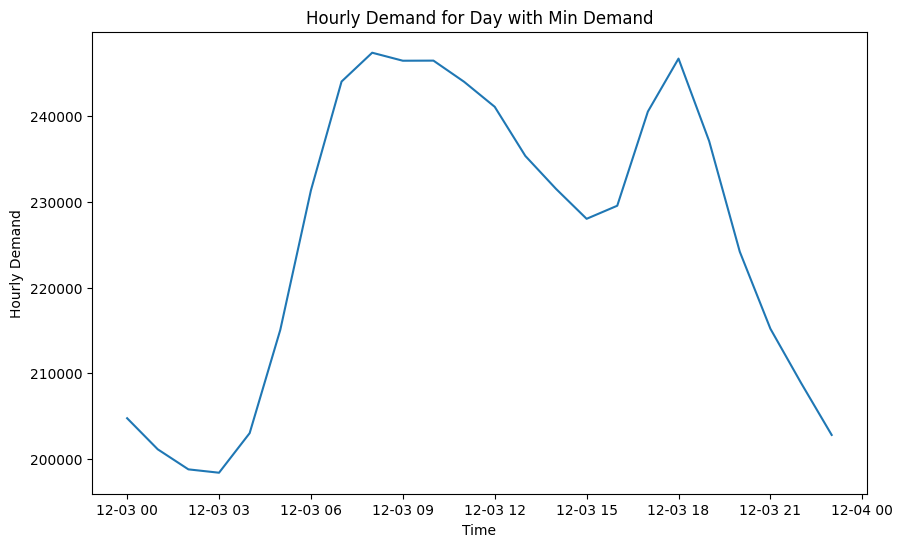

In [144]:

# Plot hourly demand
plt.figure(figsize=(10,6))
plt.plot(df_min_demand.index, df_min_demand['Hourly_Demand'])
plt.title('Hourly Demand for Day with Min Demand')
plt.xlabel('Time')
plt.ylabel('Hourly Demand')
plt.show()

In [105]:
# Convert index to datetime
df_max_demand.index = pd.to_datetime(df_max_demand.index)


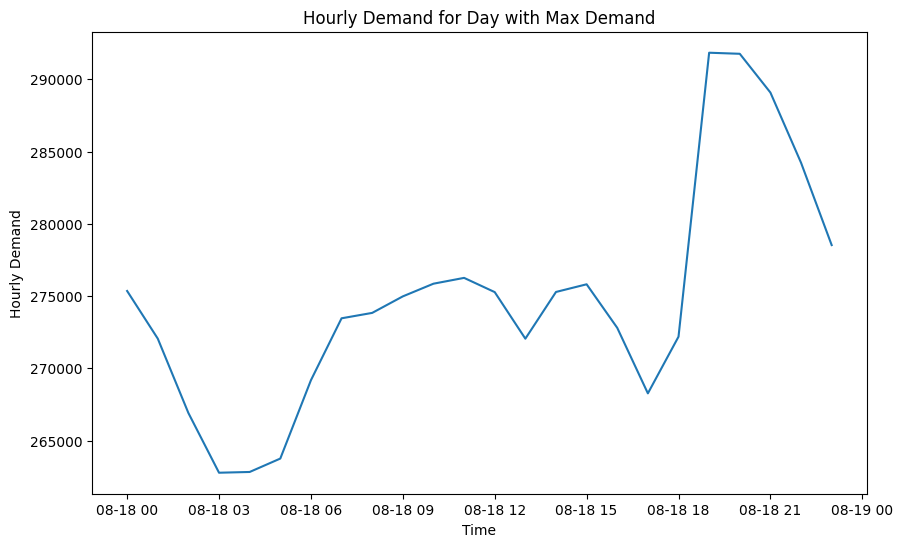

In [143]:
# Plot hourly demand
plt.figure(figsize=(10,6))
plt.plot(df_max_demand.index, df_max_demand['Hourly_Demand'])
plt.title('Hourly Demand for Day with Max Demand')
plt.xlabel('Time')
plt.ylabel('Hourly Demand')
plt.show()

In [109]:
df_vre_max.reset_index(inplace=True)

# Strip white spaces from column names
df_vre_max.columns = df_vre_max.columns.str.strip()

# Convert 'time' to datetime
df_vre_max['time'] = pd.to_datetime(df_vre_max['time'])

# Set 'time' as the index again
df_vre_max.set_index('time', inplace=True)



/var/folders/2n/1bxzp9_15mq9fkzp7g650gsc0000gn/T/ipykernel_34791/2936368479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vre_max['time'] = pd.to_datetime(df_vre_max['time'])


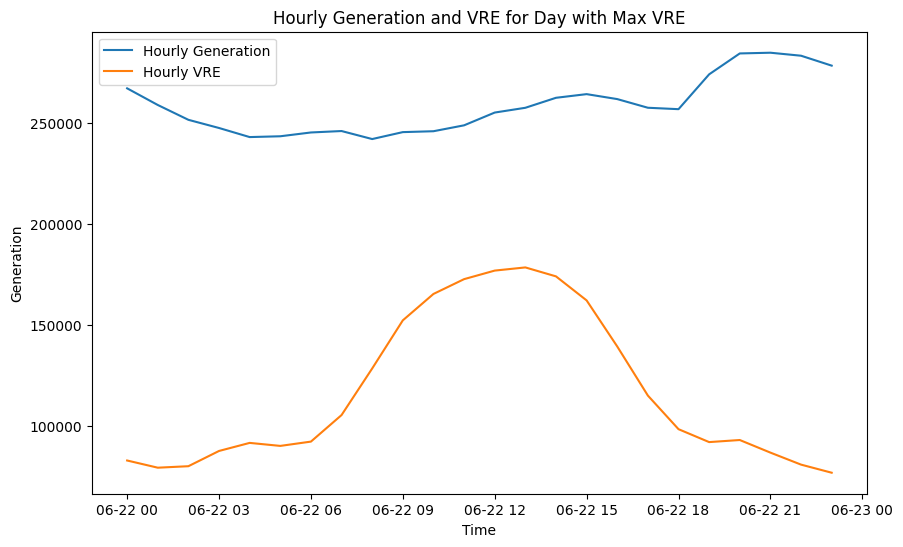

In [142]:

plt.figure(figsize=(10,6))
plt.plot(df_vre_max.index, df_vre_max['hourly_generation'], label='Hourly Generation')
plt.plot(df_vre_max.index, df_vre_max['hourly_vre'], label='Hourly VRE')
plt.title('Hourly Generation and VRE for Day with Max VRE')
plt.xlabel('Time')
plt.ylabel('Generation')
plt.legend()
plt.show()

In [112]:
# Define sunlight hours
sunlight_hours = range(6, 19)

max_solar_capacity = 189000 # in MW
max_wind_capacity = 129000 # in MW

# Define capacity factors
capacity_factor_solar = 0.3
capacity_factor_wind = 0.35

# Calculate maximum generation considering capacity factors
max_solar_generation = max_solar_capacity * capacity_factor_solar
max_wind_generation = max_wind_capacity * capacity_factor_wind

In [117]:
# Create a new DataFrame for max_demand_day with hourly details
max_demand_cur = hourly_dispatch[hourly_dispatch.index.date == max_demand_day.date()]


In [120]:
max_demand_cur.head()

,Biomass_W2E,Coal,Hydro,Hydro_RoR,I_gas,LS,Liq_Fuel,Nuclear,Small Hydro,Solar,d_gas,wind,hourly_vre,hourly_generation,solar_curtailment,wind_curtailment
time,,,,,,,,,,,,,,,,
2030-08-18 00:00:00,4918.739171,172345.800000,63800.896053,4104.5,302.000000,0.0,0.0,10405,2035.791667,0.0,5518.807632,21337.465478,21337.465478,284769.0,0.0,23812.534522
2030-08-18 01:00:00,2160.000000,172768.800000,62141.729086,4104.5,695.063483,0.0,0.0,10405,2035.791667,0.0,5744.000000,21027.115764,21027.115764,281082.0,0.0,24122.884236
2030-08-18 02:00:00,2160.000000,171855.800000,62527.696241,4104.5,728.483009,0.0,0.0,10405,2035.791667,0.0,5744.000000,15953.729083,15953.729083,275515.0,0.0,29196.270917
2030-08-18 03:00:00,2160.000000,170483.800000,63635.291540,4104.5,62.400000,0.0,0.0,10405,2035.791667,0.0,5744.000000,12418.216793,12418.216793,271049.0,0.0,32731.783207
2030-08-18 04:00:00,2160.000000,169993.839115,63387.218917,4104.5,0.000000,0.0,0.0,10405,2035.791667,0.0,5514.000000,13077.650301,13077.650301,270678.0,0.0,32072.349699


In [119]:


max_demand_cur['solar_curtailment'] = max_demand_cur.apply(lambda row: max(0, max_solar_generation - row['Solar'])
                                                         if row.name.hour in sunlight_hours else 0, axis=1)
max_demand_cur['wind_curtailment'] = max_demand_cur.apply(lambda row: max(0, max_wind_generation - row['wind']), axis=1)



/var/folders/2n/1bxzp9_15mq9fkzp7g650gsc0000gn/T/ipykernel_34791/639653707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_demand_cur['solar_curtailment'] = max_demand_cur.apply(lambda row: max(0, max_solar_generation - row['Solar'])
/var/folders/2n/1bxzp9_15mq9fkzp7g650gsc0000gn/T/ipykernel_34791/639653707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_demand_cur['wind_curtailment'] = max_demand_cur.apply(lambda row: max(0, max_wind_generation - row['wind']), axis=1)


In [ ]:
max_demand_cur.reset_index(inplace=True)

# Strip white spaces from column names
max_demand_cur.columns = max_demand_cur.columns.str.strip()

# Convert 'time' to datetime
max_demand_cur['time'] = pd.to_datetime(max_demand_cur['time'])

# Set 'time' as the index again
max_demand_cur.set_index('time', inplace=True)



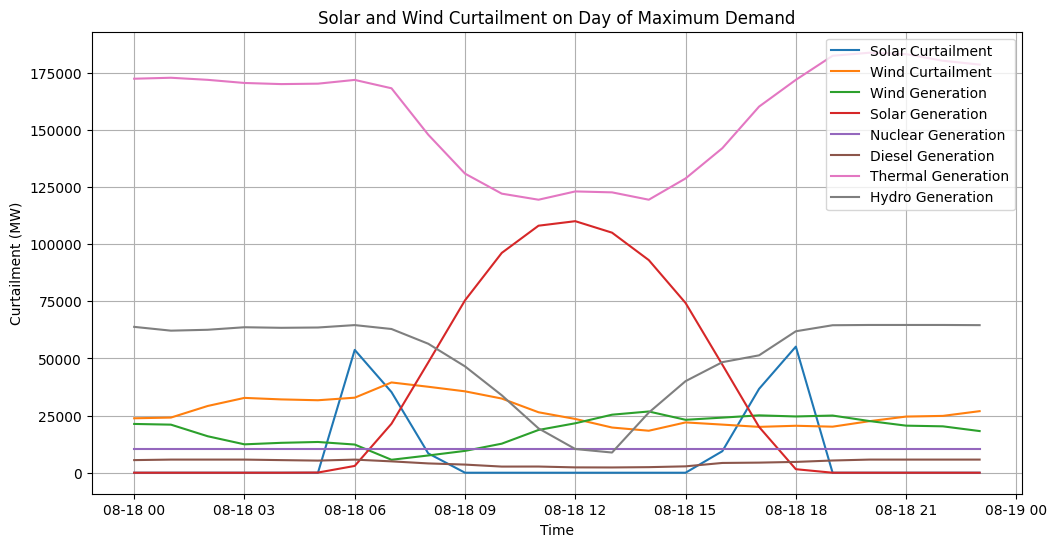

In [141]:
# Plot solar and wind curtailment
plt.figure(figsize=(12, 6))
plt.plot(max_demand_cur.index, max_demand_cur['solar_curtailment'], label='Solar Curtailment')
plt.plot(max_demand_cur.index, max_demand_cur['wind_curtailment'], label='Wind Curtailment')
plt.plot(max_demand_cur.index, max_demand_cur['wind'], label='Wind Generation')
plt.plot(max_demand_cur.index, max_demand_cur['Solar'], label='Solar Generation')
plt.plot(max_demand_cur.index, max_demand_cur['Nuclear'], label='Nuclear Generation')
plt.plot(max_demand_cur.index, max_demand_cur['d_gas'], label='Diesel Generation')
plt.plot(max_demand_cur.index, max_demand_cur['Coal'], label='Thermal Generation')
plt.plot(max_demand_cur.index, max_demand_cur['Hydro'], label='Hydro Generation')




plt.xlabel('Time')
plt.ylabel('Curtailment (MW)')
plt.title('Solar and Wind Curtailment on Day of Maximum Demand')
plt.legend()
plt.grid()
plt.show()

In [128]:
# Get data for min_demand_day
min_demand_cur = hourly_dispatch[hourly_dispatch.index.date == min_demand_day.date()]


In [129]:
# Calculate solar and wind curtailment
min_demand_cur['solar_curtailment'] = min_demand_cur.apply(lambda row: max(0, max_solar_generation - row['Solar'])
                                                         if row.name.hour in sunlight_hours else 0, axis=1)
min_demand_cur['wind_curtailment'] = min_demand_cur.apply(lambda row: max(0, max_wind_generation - row['wind']), axis=1)


/var/folders/2n/1bxzp9_15mq9fkzp7g650gsc0000gn/T/ipykernel_34791/1903416256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_demand_cur['solar_curtailment'] = min_demand_cur.apply(lambda row: max(0, max_solar_generation - row['Solar'])
/var/folders/2n/1bxzp9_15mq9fkzp7g650gsc0000gn/T/ipykernel_34791/1903416256.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_demand_cur['wind_curtailment'] = min_demand_cur.apply(lambda row: max(0, max_wind_generation - row['wind']), axis=1)


In [130]:
min_demand_cur.reset_index(inplace=True)

# Strip white spaces from column names
min_demand_cur.columns = min_demand_cur.columns.str.strip()

# Convert 'time' to datetime
min_demand_cur['time'] = pd.to_datetime(min_demand_cur['time'])

# Set 'time' as the index
min_demand_cur.set_index('time', inplace=True)

/var/folders/2n/1bxzp9_15mq9fkzp7g650gsc0000gn/T/ipykernel_34791/3958305419.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_demand_cur['time'] = pd.to_datetime(min_demand_cur['time'])


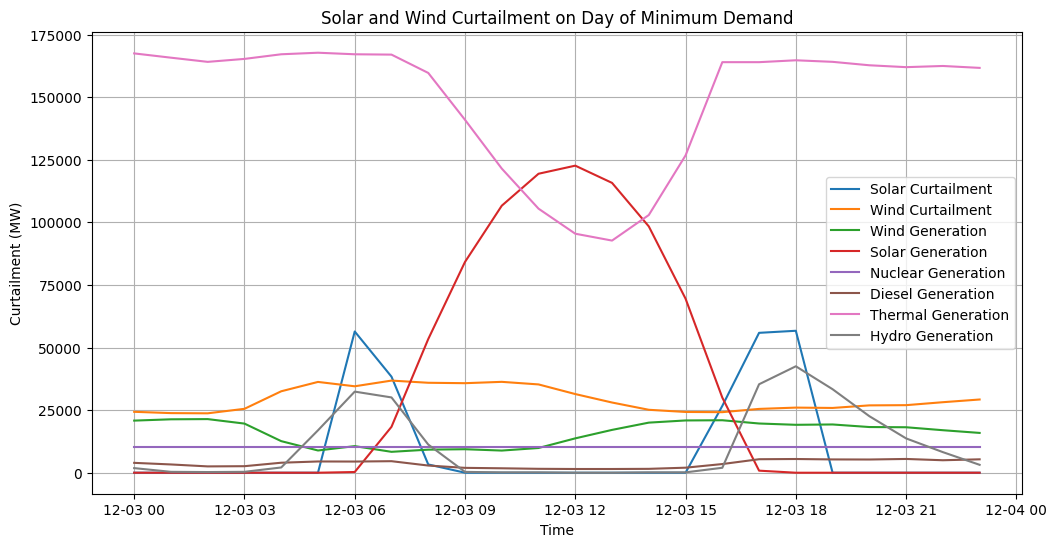

In [139]:
# Plot solar and wind curtailment
plt.figure(figsize=(12, 6))
plt.plot(min_demand_cur.index, min_demand_cur['solar_curtailment'], label='Solar Curtailment')
plt.plot(min_demand_cur.index, min_demand_cur['wind_curtailment'], label='Wind Curtailment')
plt.plot(min_demand_cur.index, min_demand_cur['wind'], label='Wind Generation')
plt.plot(min_demand_cur.index, min_demand_cur['Solar'], label='Solar Generation')
plt.plot(min_demand_cur.index, min_demand_cur['Nuclear'], label='Nuclear Generation')
plt.plot(min_demand_cur.index, min_demand_cur['d_gas'], label='Diesel Generation')
plt.plot(min_demand_cur.index, min_demand_cur['Coal'], label='Thermal Generation')
plt.plot(min_demand_cur.index, min_demand_cur['Hydro'], label='Hydro Generation')

plt.xlabel('Time')
plt.ylabel('Curtailment (MW)')
plt.title('Solar and Wind Curtailment on Day of Minimum Demand')
plt.legend()
plt.grid()
plt.show()

In [140]:
# Get data for vre_max_day
vre_max_cur = hourly_dispatch[hourly_dispatch.index.date == max_vre_day.date()]


In [133]:
# Calculate solar and wind curtailment
vre_max_cur['solar_curtailment'] = vre_max_cur.apply(lambda row: max(0, max_solar_generation - row['Solar'])
                                                         if row.name.hour in sunlight_hours else 0, axis=1)
vre_max_cur['wind_curtailment'] = vre_max_cur.apply(lambda row: max(0, max_wind_generation - row['wind']), axis=1)


/var/folders/2n/1bxzp9_15mq9fkzp7g650gsc0000gn/T/ipykernel_34791/1977927157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vre_max_cur['solar_curtailment'] = vre_max_cur.apply(lambda row: max(0, max_solar_generation - row['Solar'])
/var/folders/2n/1bxzp9_15mq9fkzp7g650gsc0000gn/T/ipykernel_34791/1977927157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vre_max_cur['wind_curtailment'] = vre_max_cur.apply(lambda row: max(0, max_wind_generation - row['wind']), axis=1)


In [134]:
vre_max_cur.reset_index(inplace=True)

# Strip white spaces from column names
vre_max_cur.columns = vre_max_cur.columns.str.strip()

# Convert 'time' to datetime
vre_max_cur['time'] = pd.to_datetime(vre_max_cur['time'])

# Set 'time' as the index
vre_max_cur.set_index('time', inplace=True)

/var/folders/2n/1bxzp9_15mq9fkzp7g650gsc0000gn/T/ipykernel_34791/3411922555.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vre_max_cur['time'] = pd.to_datetime(vre_max_cur['time'])


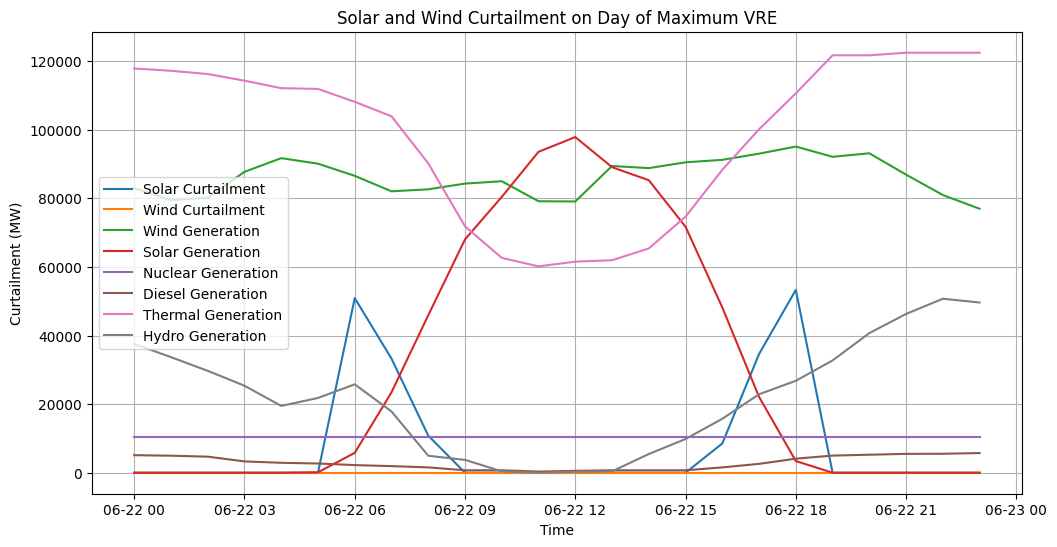

In [138]:
# Plot solar and wind curtailment
plt.figure(figsize=(12, 6))
plt.plot(vre_max_cur.index, vre_max_cur['solar_curtailment'], label='Solar Curtailment')
plt.plot(vre_max_cur.index, vre_max_cur['wind_curtailment'], label='Wind Curtailment')
plt.plot(vre_max_cur.index, vre_max_cur['wind'], label='Wind Generation')
plt.plot(vre_max_cur.index, vre_max_cur['Solar'], label='Solar Generation')
plt.plot(vre_max_cur.index, vre_max_cur['Nuclear'], label='Nuclear Generation')
plt.plot(vre_max_cur.index, vre_max_cur['d_gas'], label='Diesel Generation')
plt.plot(vre_max_cur.index, vre_max_cur['Coal'], label='Thermal Generation')
plt.plot(vre_max_cur.index, vre_max_cur['Hydro'], label='Hydro Generation')


plt.xlabel('Time')
plt.ylabel('Curtailment (MW)')
plt.title('Solar and Wind Curtailment on Day of Maximum VRE')
plt.legend()
plt.grid()
plt.show()

In [151]:
max_demand_cur.head(24)

,Biomass_W2E,Coal,Hydro,Hydro_RoR,I_gas,LS,Liq_Fuel,Nuclear,Small Hydro,Solar,d_gas,wind,hourly_vre,hourly_generation,solar_curtailment,wind_curtailment
time,,,,,,,,,,,,,,,,
2030-08-18 00:00:00,4918.739171,172345.800000,63800.896053,4104.5,302.000000,0.0,0.0,10405,2035.791667,0.000000,5518.807632,21337.465478,21337.465478,284769.0,0.000000,23812.534522
2030-08-18 01:00:00,2160.000000,172768.800000,62141.729086,4104.5,695.063483,0.0,0.0,10405,2035.791667,0.000000,5744.000000,21027.115764,21027.115764,281082.0,0.000000,24122.884236
2030-08-18 02:00:00,2160.000000,171855.800000,62527.696241,4104.5,728.483009,0.0,0.0,10405,2035.791667,0.000000,5744.000000,15953.729083,15953.729083,275515.0,0.000000,29196.270917
2030-08-18 03:00:00,2160.000000,170483.800000,63635.291540,4104.5,62.400000,0.0,0.0,10405,2035.791667,0.000000,5744.000000,12418.216793,12418.216793,271049.0,0.000000,32731.783207
2030-08-18 04:00:00,2160.000000,169993.839115,63387.218917,4104.5,0.000000,0.0,0.0,10405,2035.791667,0.000000,5514.000000,13077.650301,13077.650301,270678.0,0.000000,32072.349699
2030-08-18 05:00:00,2064.800000,170180.084398,63521.257213,4104.5,0.000000,0.0,0.0,10405,2035.791667,76.153053,5303.600000,13447.813669,13523.966722,271139.0,0.000000,31702.186331
2030-08-18 06:00:00,2160.000000,171823.029451,64572.825418,4104.5,0.000000,0.0,0.0,10405,2035.791667,2973.412896,5735.903588,12326.536981,15299.949876,276137.0,53726.587104,32823.463019
2030-08-18 07:00:00,590.374245,168164.074545,62865.950000,4104.5,0.000000,0.0,0.0,10405,2035.791667,21421.151537,4966.312669,5661.845337,27082.996874,280215.0,35278.848463,39488.154663
2030-08-18 08:00:00,0.000000,147860.789736,56418.929624,4104.5,0.000000,0.0,0.0,10405,2035.791667,48241.189443,4069.409097,7547.390435,55788.579877,280683.0,8458.810557,37602.609565


In [152]:
min_demand_cur.head(24)

,Biomass_W2E,Coal,Hydro,Hydro_RoR,I_gas,LS,Liq_Fuel,Nuclear,Small Hydro,Solar,d_gas,wind,hourly_vre,hourly_generation,solar_curtailment,wind_curtailment
time,,,,,,,,,,,,,,,,
2030-12-03 00:00:00,537.300000,167495.000000,1838.900000,1639.916667,0.0,-4.547474e-13,0.0,10405,935.333333,0.000000,3943.499113,20816.050887,20816.050887,207611.0,0.000000,24333.949113
2030-12-03 01:00:00,0.000000,165786.502555,357.000000,1639.916667,0.0,5.085179e-14,0.0,10405,935.333333,0.000000,3303.200000,21337.047445,21337.047445,203764.0,0.000000,23812.952555
2030-12-03 02:00:00,0.000000,164117.643881,266.848795,1639.916667,0.0,-2.027545e-13,0.0,10405,935.333333,0.000000,2526.600000,21419.657324,21419.657324,201311.0,0.000000,23730.342676
2030-12-03 03:00:00,0.000000,165297.987914,357.000000,1639.916667,0.0,1.380673e-12,0.0,10405,935.333333,0.000000,2608.000000,19625.762086,19625.762086,200869.0,0.000000,25524.237914
2030-12-03 04:00:00,6667.245895,167148.000000,2095.750000,1639.916667,0.0,1.759703e-14,0.0,10405,935.333333,0.000000,3992.400000,12618.354105,12618.354105,205502.0,0.000000,32531.645895
2030-12-03 05:00:00,6783.000000,167768.000000,16931.082349,1639.916667,0.0,-1.186308e-13,0.0,10405,935.333333,0.000000,4495.394712,8882.272938,8882.272938,217840.0,0.000000,36267.727062
2030-12-03 06:00:00,6783.000000,167148.000000,32396.294155,1639.916667,0.0,-1.146895e-13,0.0,10405,935.333333,284.769043,4461.400000,10621.286801,10906.055845,234675.0,56415.230957,34528.713199
2030-12-03 07:00:00,6783.000000,167012.000000,30076.392439,1639.916667,0.0,-4.263256e-14,0.0,10405,935.333333,18331.452483,4607.000000,8347.905078,26679.357561,248138.0,38368.547517,36802.094922
2030-12-03 08:00:00,2803.905686,159694.837417,11252.298304,1639.916667,0.0,-7.105427e-13,0.0,10405,935.333333,53395.112483,2867.078412,9219.517698,62614.630181,252213.0,3304.887517,35930.482302


In [153]:
vre_max_cur.head(24)

,Biomass_W2E,Coal,Hydro,Hydro_RoR,I_gas,LS,Liq_Fuel,Nuclear,Small Hydro,Solar,d_gas,wind,hourly_vre,hourly_generation
time,,,,,,,,,,,,,,
2030-06-22 00:00:00,6783.000000,117843.000000,37552.974155,4245.041667,0.0,0.0,0.0,10405,2136.708333,0.000000,5113.000000,82994.275845,82994.275845,267073.0
2030-06-22 01:00:00,6783.000000,117174.000000,33702.183041,4245.041667,0.0,0.0,0.0,10405,2136.708333,0.000000,4961.400000,79432.666959,79432.666959,258840.0
2030-06-22 02:00:00,3925.734237,116234.000000,29704.650000,4245.041667,0.0,0.0,0.0,10405,2136.708333,0.000000,4681.400000,80169.465763,80169.465763,251502.0
2030-06-22 03:00:00,0.000000,114289.850000,25367.514044,4245.041667,0.0,0.0,0.0,10405,2136.708333,0.000000,3301.000000,87711.885956,87711.885956,247457.0
2030-06-22 04:00:00,0.000000,112105.361255,19479.700000,4245.041667,0.0,0.0,0.0,10405,2136.708333,0.000000,2893.400000,91699.788745,91699.788745,242965.0
2030-06-22 05:00:00,0.000000,111886.867588,21790.737198,4245.041667,0.0,0.0,0.0,10405,2136.708333,115.645094,2685.200000,90097.800119,90213.445213,243363.0
2030-06-22 06:00:00,0.000000,108126.700000,25770.286073,4245.041667,0.0,0.0,0.0,10405,2136.708333,5790.428435,2221.800000,86548.035492,92338.463927,245244.0
2030-06-22 07:00:00,0.000000,103907.622847,17870.950000,4245.041667,0.0,0.0,0.0,10405,2136.708333,23432.503452,1920.800000,82035.373701,105467.877153,245954.0
2030-06-22 08:00:00,0.000000,90184.492935,4950.128621,4245.041667,0.0,0.0,0.0,10405,2136.708333,45892.582437,1557.000000,82618.046006,128510.628444,241989.0
